Import packages

In [12]:
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats import mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [3]:
selfimprovement = pd.read_csv("data/selfimpr_liwc.csv")
investing = pd.read_csv("data/investing-liwc.csv")
homeowners = pd.read_csv("data/homeowners_liwc.csv")

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/3194509895.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  selfimprovement = pd.read_csv("data/liwc+mfd2-results.csv")
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/3194509895.py:2: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  investing = pd.read_csv("data_to_compare/liwc/investing-liwc+mfd2.csv")
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/3194509895.py:3: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  homeowners = pd.read_csv("data_to_compare/liwc/homeowners-liwc+mfd2.csv")


In [5]:
selfimprovement.columns

Index(['Unnamed: 0', 'id', 'created', 'author', 'score', 'num_comments',
       'link', 'cleaned_text', 'word_count', 'type', 'link_id', 'year',
       'month', 'Segment_1', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger',
       'emo_sad', 'moral', 'Segment', 'Care_Virtue', 'Care_Vice',
       'Fairness_Virtue', 'Fairness_Vice', 'Loyalty_Virtue', 'Loyalty_Vice',
       'Authority_Virtue', 'Authority_Vice', 'Sanctity_Virtue',
       'Sanctity_Vice'],
      dtype='object')

# Is moral language present in discussions about self-improvement?

### Basic descriptive statistics

In [3]:
selfimprovement.moral.describe()

count    507516.000000
mean          0.320543
std           0.688991
min           0.000000
25%           0.000000
50%           0.000000
75%           0.380000
max          14.810000
Name: moral, dtype: float64

In [4]:
investing.moral.describe()

count    504192.000000
mean          0.191849
std           0.545491
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.110000
Name: moral, dtype: float64

In [5]:
homeowners.moral.describe()

count    502533.000000
mean          0.154164
std           0.491306
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          13.890000
Name: moral, dtype: float64

### Statistical tests

Kruskall wallis between the three subreddits

In [9]:
h_stat, p_value = stats.kruskal(selfimprovement.moral, homeowners.moral, investing.moral)
print("H-statistic:", h_stat)
print(f"p-value: {p_value:.2e}")

H-statistic: 42853.6702055584
p-value: 0.00e+00


There is a large difference in at least one of the subreddits. Now run Mann-Whitney U to see differences on the specific subreddits

In [17]:
# One-tailed test: selfimprovement > homeowners
u_stat, p_value = stats.mannwhitneyu(selfimprovement.moral, homeowners.moral, alternative='greater')
print(f"Selfimprovement vs Homeowners p-value (greater): {p_value:.2e}")

# One-tailed test: selfimprovement > investing
u_stat, p_value = stats.mannwhitneyu(selfimprovement.moral, investing.moral, alternative='greater')
print(f"Selfimprovement vs Investing p-value (greater): {p_value:.2e}")


Selfimprovement vs Homeowners p-value (greater): 0.00e+00
Selfimprovement vs Investing p-value (greater): 0.00e+00


# How is the use of moral language associated with negative emotion in the context of self-improvement?

In [4]:
selfimprovement_moralized = selfimprovement[selfimprovement.moral > 0.25]
selfimprovement_not_moralized = selfimprovement[selfimprovement.moral <= 0.25]

print(selfimprovement_moralized.shape)
print(selfimprovement_not_moralized.shape)

(138853, 31)
(368663, 31)


## Compare emo_neg scores

Get scores

In [8]:
emoneg_moralized = selfimprovement_moralized["emo_neg"]
emoneg_not_moralized = selfimprovement_not_moralized["emo_neg"]

Run Mann Whitney U test

In [9]:
u_stat, p_value = mannwhitneyu(
    emoneg_moralized, 
    emoneg_not_moralized, 
    alternative='greater'
)

print(f"U-statistic: {u_stat}")
print(f"p-value (greater): {p_value:.2e}")

U-statistic: 29251659541.5
p-value (greater): 0.00e+00


Check medians

In [15]:
print("Median emo_neg (moralized posts):", emoneg_moralized.median())
print("Median emo_neg (not moralized posts):", emoneg_not_moralized.median())

Median emo_neg (moralized posts): 0.84
Median emo_neg (not moralized posts): 0.37


Visualize

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/1310022919.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoneg_moralized, label="Moralized", shade=True)
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/1310022919.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoneg_not_moralized, label="Not Moralized", shade=True)


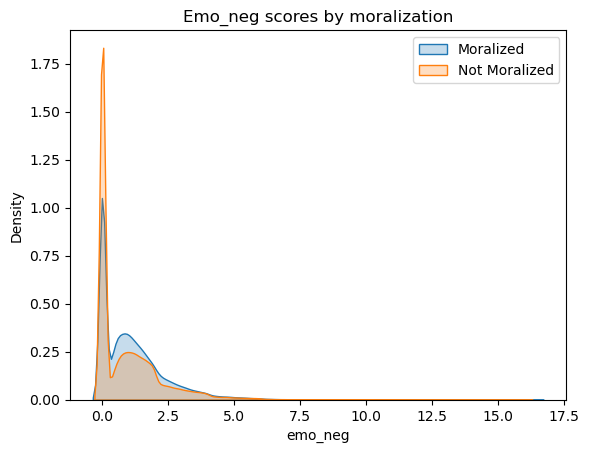

In [21]:
sns.kdeplot(emoneg_moralized, label="Moralized", shade=True)
sns.kdeplot(emoneg_not_moralized, label="Not Moralized", shade=True)
plt.title("Emo_neg scores by moralization")
plt.xlabel("emo_neg")
plt.legend()
plt.show()

## Compare anger scores

In [16]:
emoang_moralized = selfimprovement_moralized["emo_anger"]
emoang_not_moralized = selfimprovement_not_moralized["emo_anger"]

Run Mann Whitney U test

In [17]:
u_stat_ang, p_value_ang = mannwhitneyu(
    emoang_moralized, 
    emoang_not_moralized, 
    alternative='greater'
)

print(f"U-statistic: {u_stat_ang}")
print(f"p-value (greater): {p_value_ang:.2e}")

U-statistic: 28400122240.5
p-value (greater): 0.00e+00


Check distributions

In [19]:
emoang_moralized.describe()

count    138853.000000
mean          0.229045
std           0.592559
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          11.540000
Name: emo_anger, dtype: float64

In [20]:
emoang_not_moralized.describe()

count    368663.000000
mean          0.143516
std           0.519755
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          12.860000
Name: emo_anger, dtype: float64

/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/256405047.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoang_moralized, label="Moralized", shade=True)
/var/folders/5q/yq3hk8g1793ckqmn2n3xpr6c0000gn/T/ipykernel_15625/256405047.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(emoang_not_moralized, label="Not Moralized", shade=True)


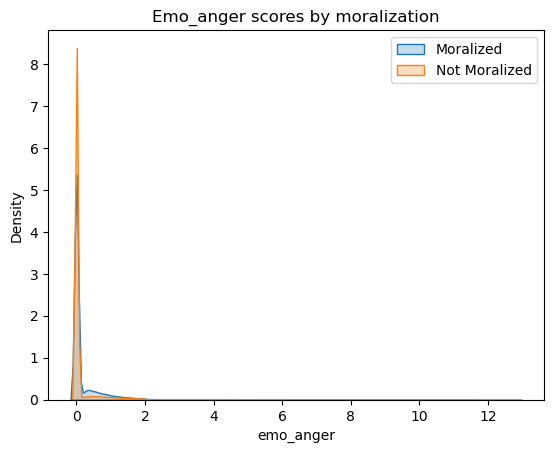

In [22]:
sns.kdeplot(emoang_moralized, label="Moralized", shade=True)
sns.kdeplot(emoang_not_moralized, label="Not Moralized", shade=True)
plt.title("Emo_anger scores by moralization")
plt.xlabel("emo_anger")
plt.legend()
plt.show()